In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [404]:
def complex_interaction(x_window):
    """
    Applies an arbitrary complex interaction to the elements of x_window.
    :param x_window: A numpy array of the last SEQ_LEN elements in the sequence.
    :return: A single float value resulting from the complex interaction.
    """
    SEQ_LEN = len(x_window)
    pos = np.arange(1, SEQ_LEN + 1)  # Positional information

    # Arbitrary complex interaction:
    # - Sine of the positions to introduce periodicity
    # - Power of elements to their reversed positions for non-linear scaling
    # - A polynomial term for an additional non-linear interaction
    interaction = np.sum(
        np.sin(pos * 2 * np.pi / SEQ_LEN)
        + np.cos(pos * 2 * np.pi / SEQ_LEN) * np.power(x_window, 2 / pos[::-1])
    )

    return interaction


x = np.arange(0, 2, 1e-4)
SEQ_LEN = 10
y = []
lo = -0.4
hi = 0.6
params = np.arange(lo, hi, 1.0 / ((hi - lo) * SEQ_LEN))
for idx in range(len(x)):
    sequence_dependent_params = (
        params[0 : min(idx + 1, SEQ_LEN)]
        * 1.0
        / (np.arange(1, min(idx + 2, SEQ_LEN + 1)))
    )
    # print(sequence_dependent_params, ' len = ', len(sequence_dependent_params))
    x_window = x[max(0, idx - SEQ_LEN + 1) : (idx + 1)]

    interaction = complex_interaction(x_window)
    # print(x_window)
    y.append(interaction)
    # print()

In [430]:
len(x), len(y)

(20000, 20000)

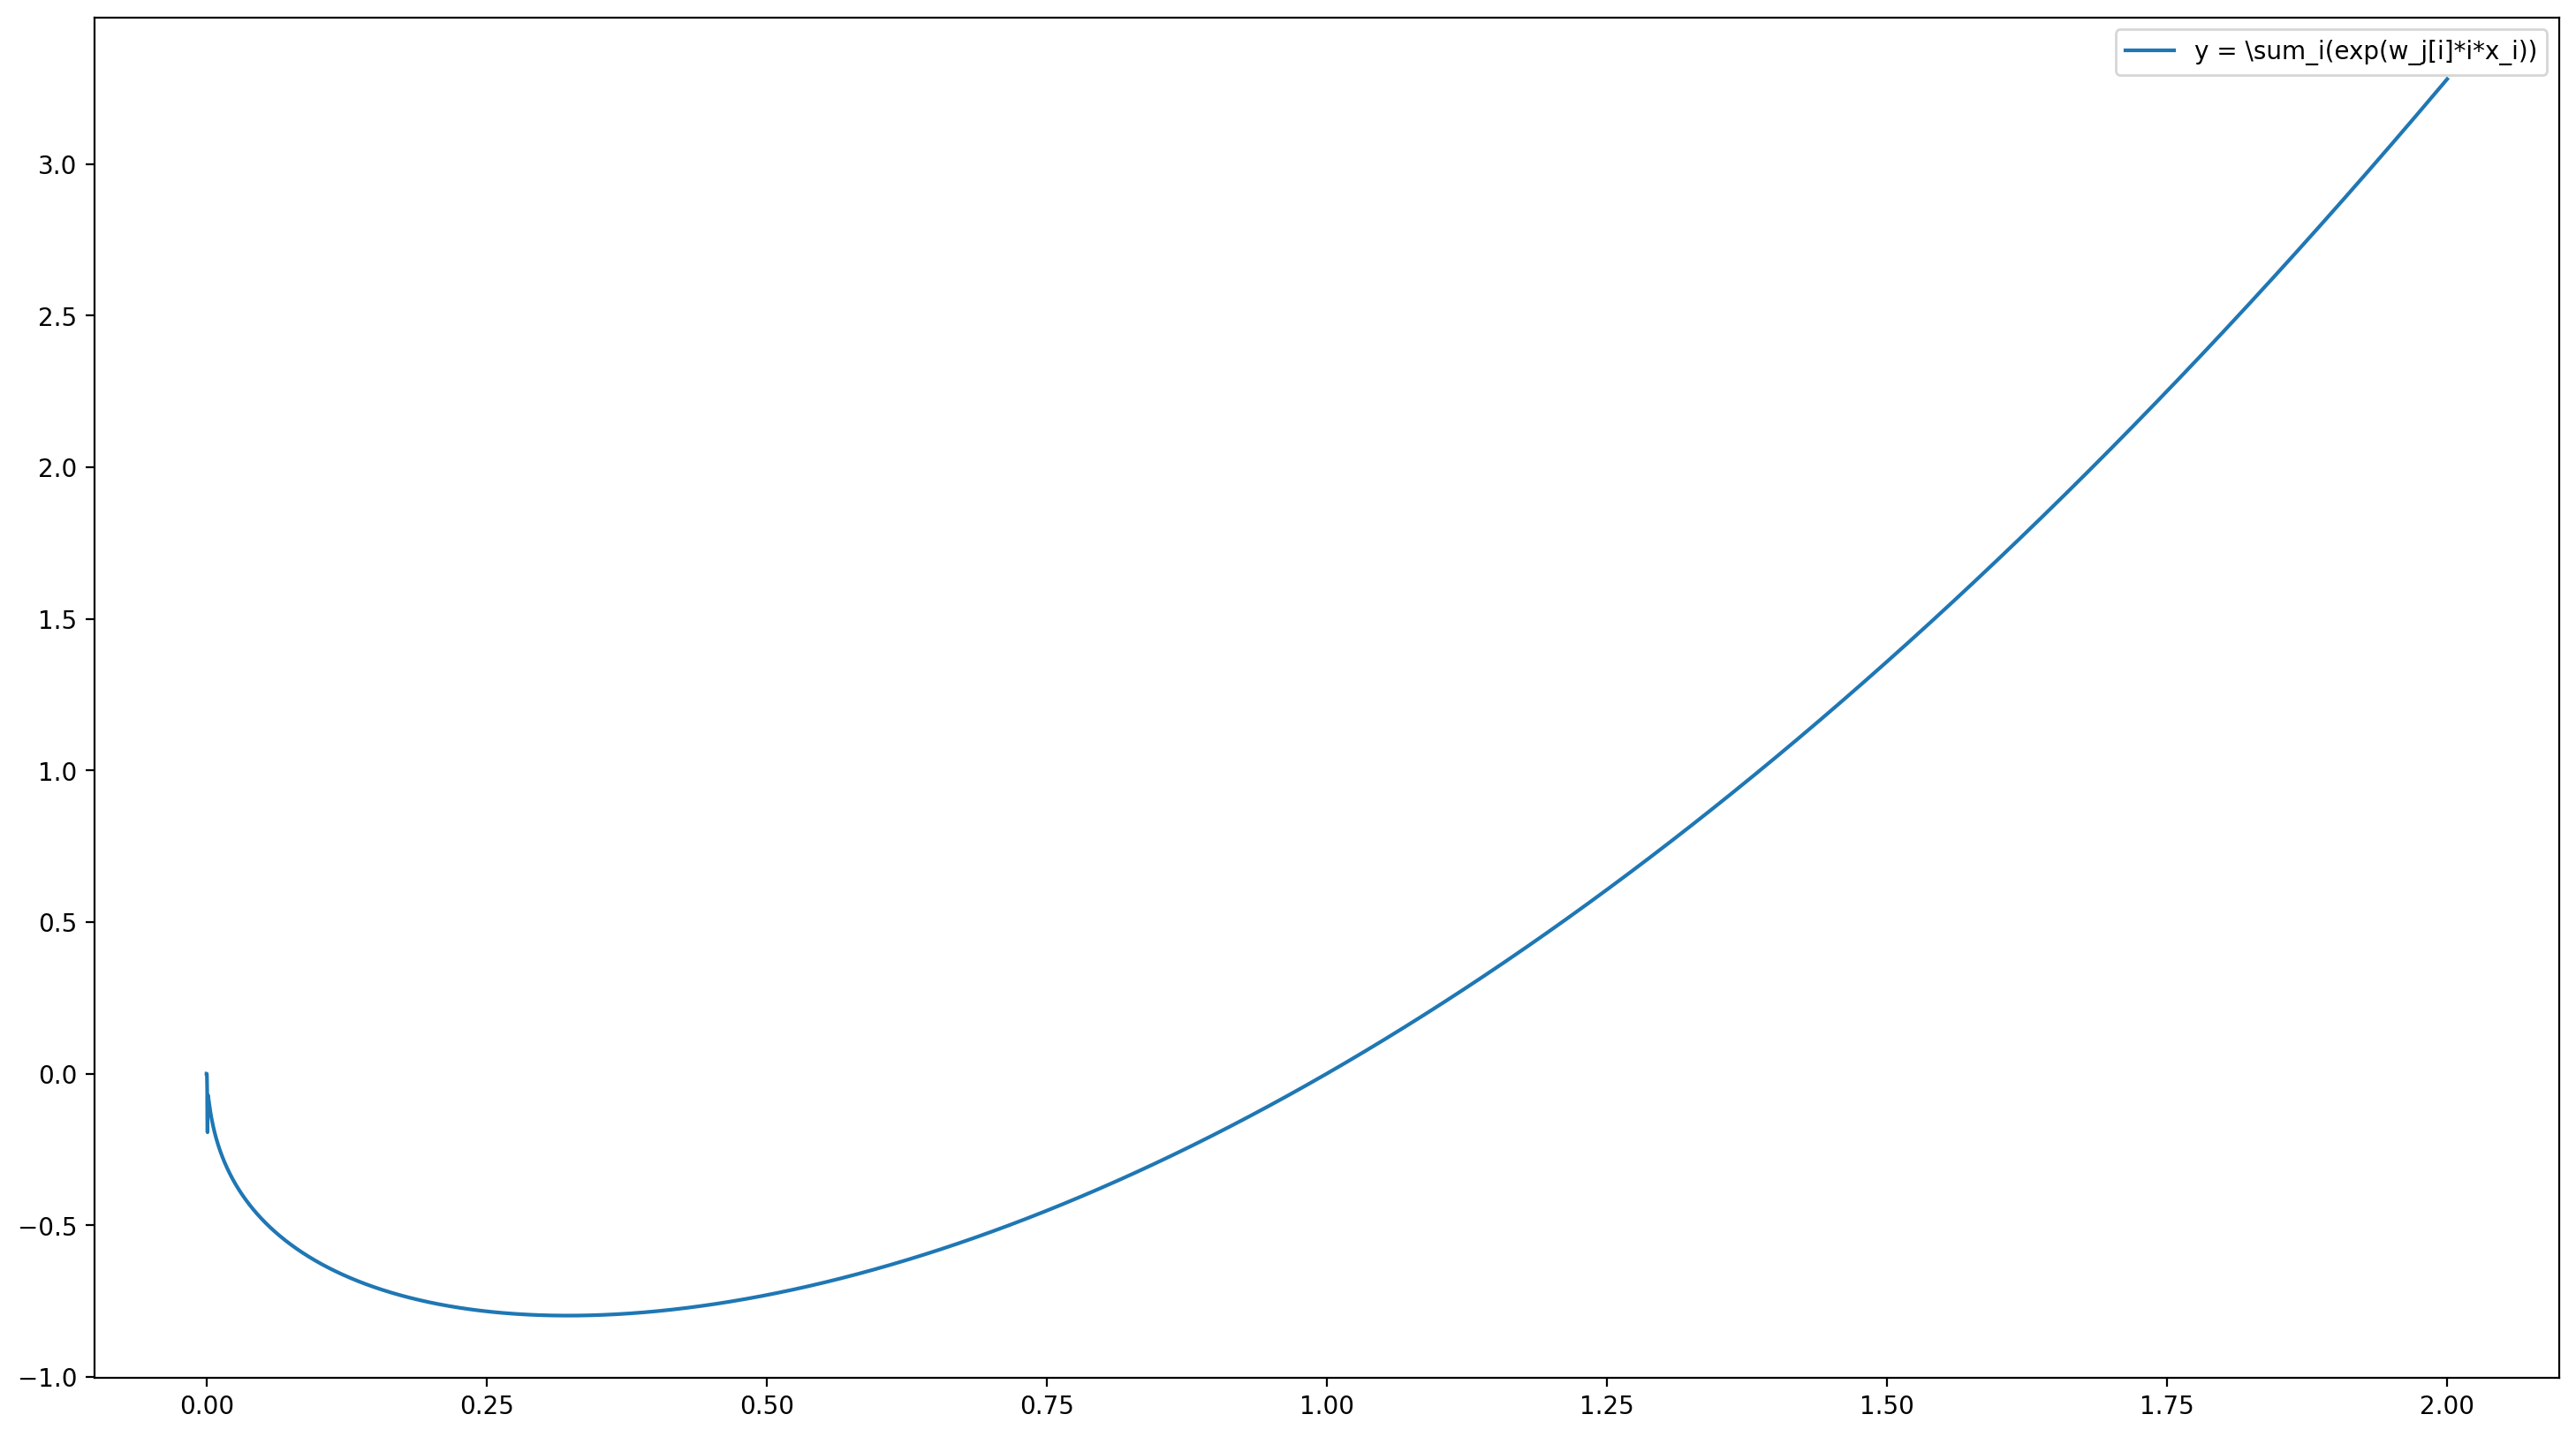

In [355]:
# Plot the data
ax = plt.subplot(111)
ax.figure.set_size_inches(18, 10)
ax.figure.set_dpi(200)
ax.plot(x, y, label="y = \sum_i(exp(w_j[i]*i*x_i))")
_ = ax.legend()

Each element in the dataloader gives me a batch of size torch.Size([56, 10, 1])



In [351]:
_x.shape

torch.Size([56, 10, 1])

In [419]:
torch.cat(y_train_parts, dim=0).view(-1).shape

torch.Size([15992])

In [431]:
SLICE_SIZE

2000

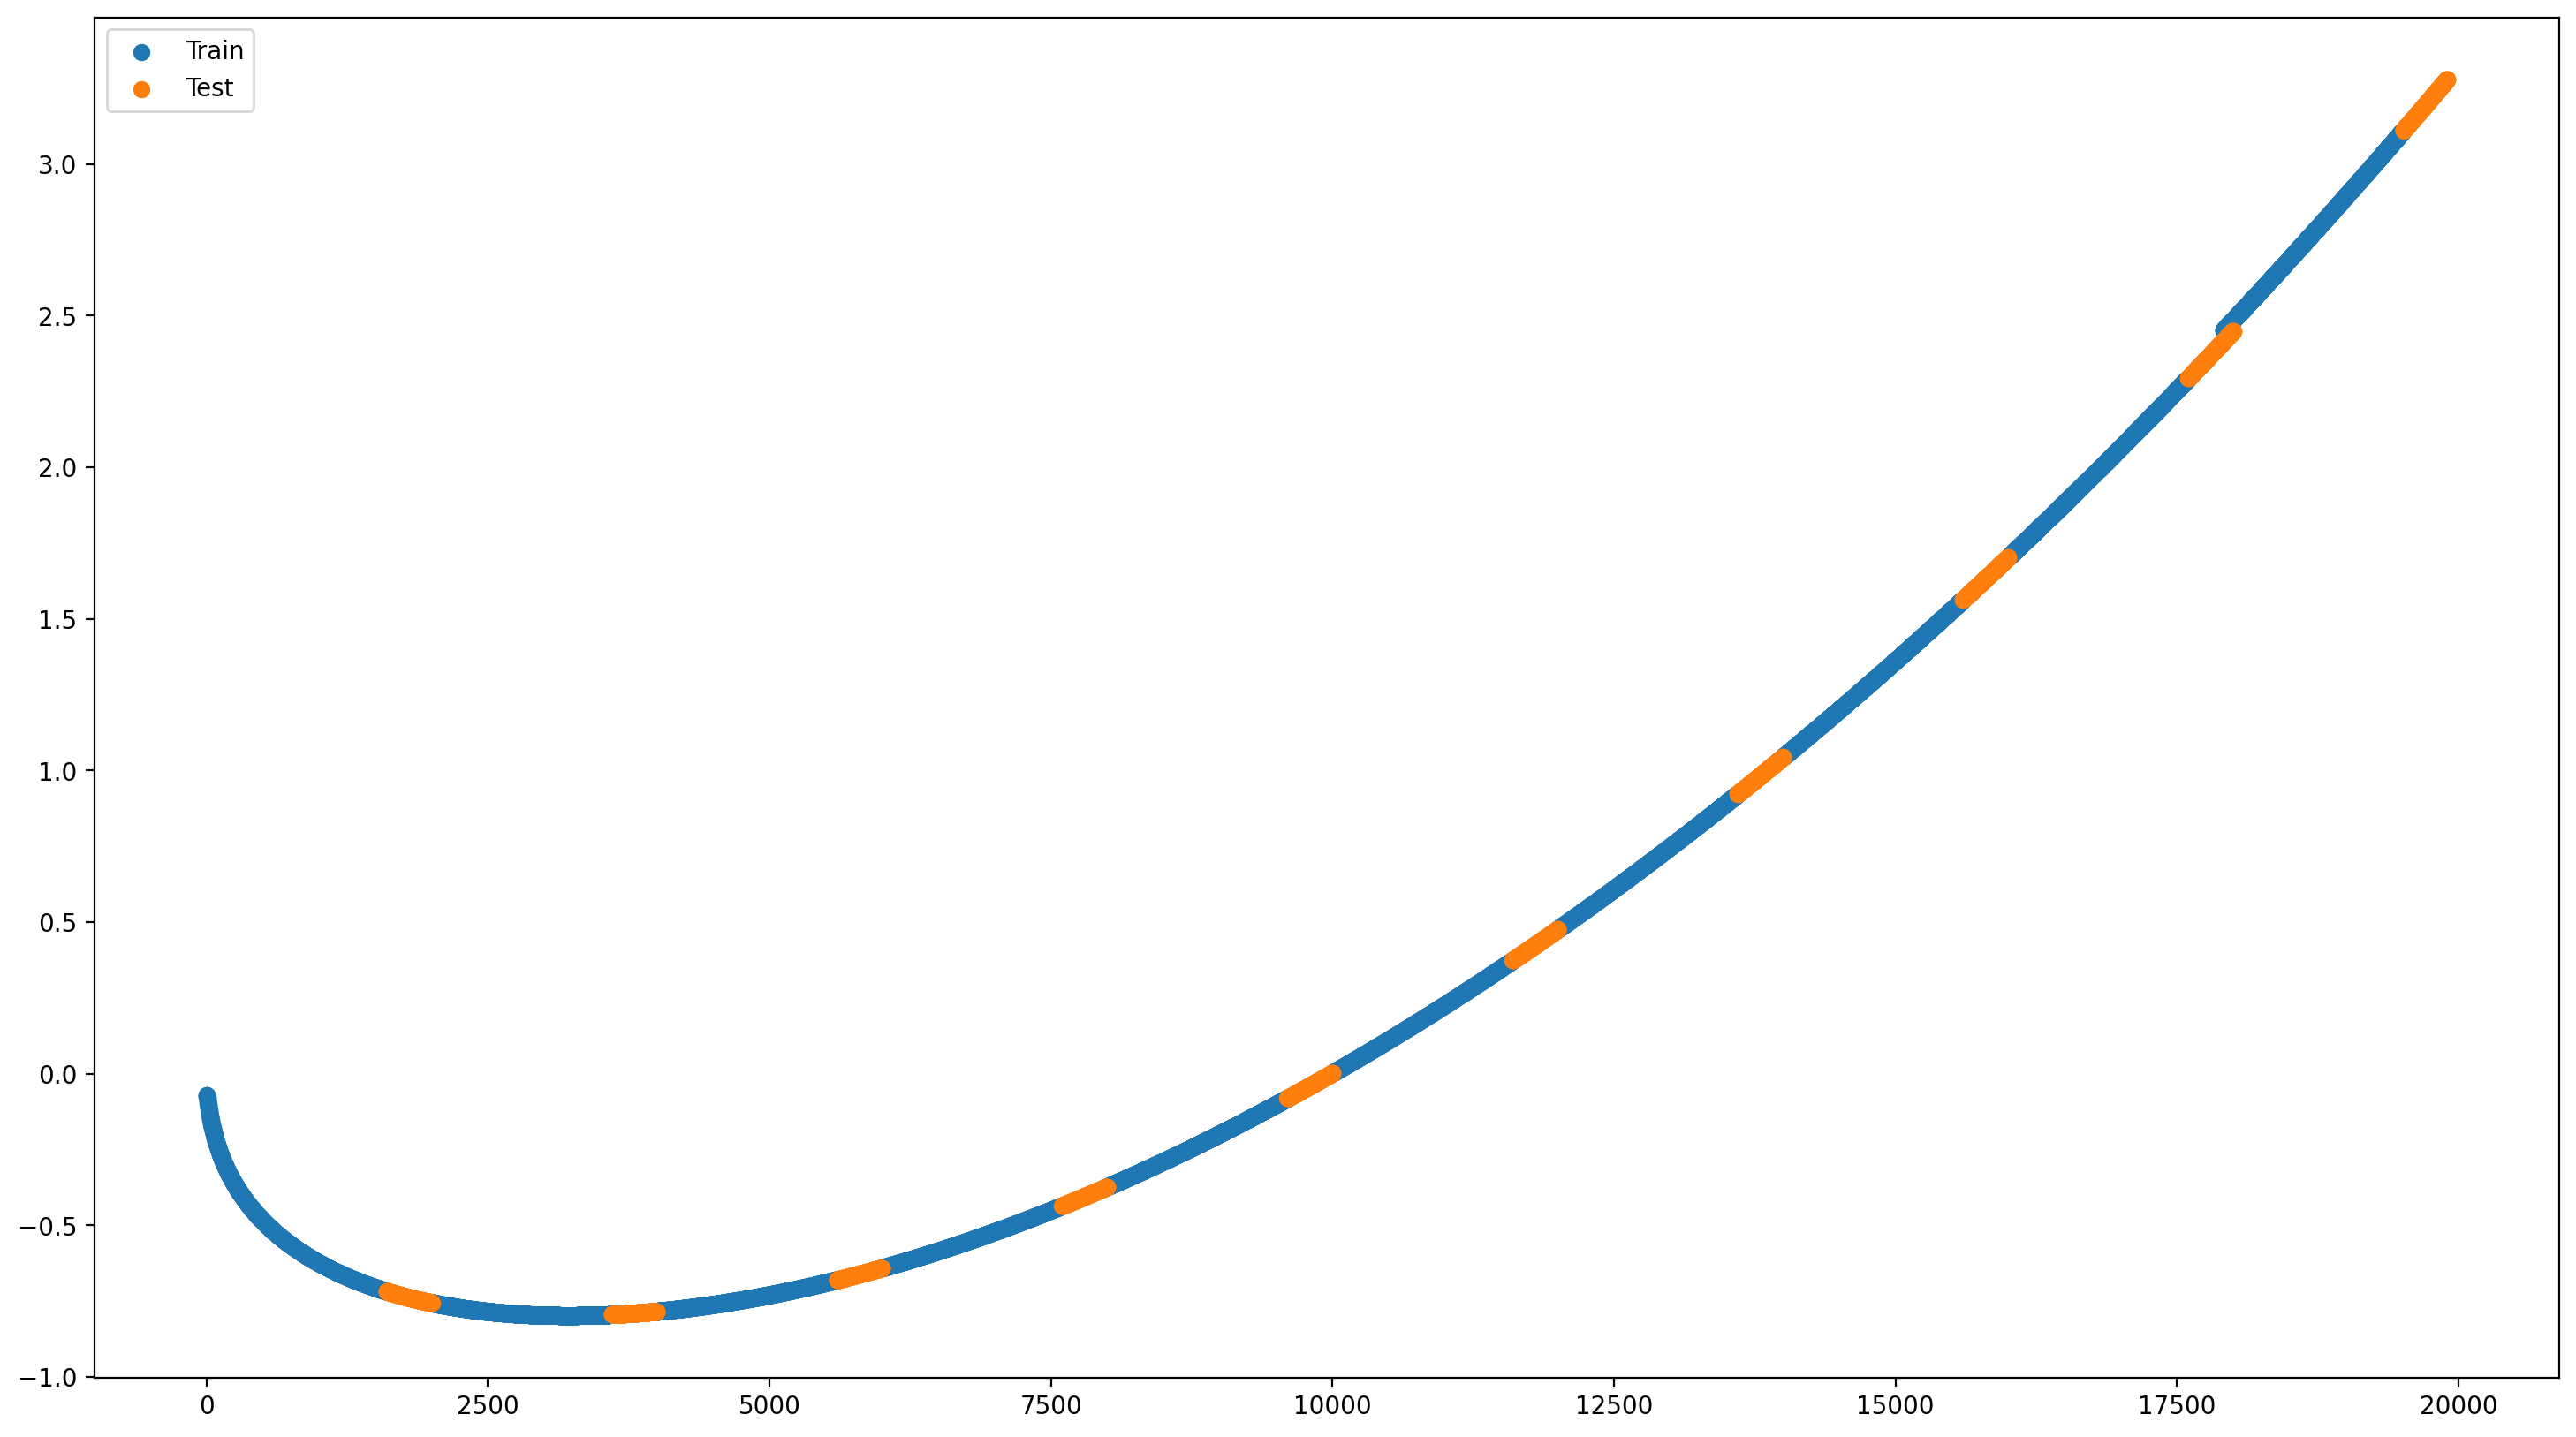

In [465]:
from sklearn.model_selection import train_test_split

#
# Assuming `x` and `y` are your data generated by the earlier function
# Convert `y` to a more suitable shape for RNN training
y = np.array(y).reshape(-1, 1)

# Define the sequence length
sequence_length = 10


# Function to chop data into sequences
def create_sequences(y, seq_length):
    xs, ys = [], []
    for i in range(len(y) - seq_length):
        xs.append(y[i : (i + seq_length)])
        ys.append(y[i + seq_length])
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)


# Create sequences
x_seq, y_seq = create_sequences(y, sequence_length)
n_train = int(len(x_seq) * 0.8)

# Split the curve into many parts(like sampling)
PARTS = 10
SLICE_SIZE = len(y) // PARTS
y_train_idx_for_plots = []
y_test_idx_for_plots = []
y_train_parts = []
y_test_parts = []
for i in range(10):
    y_slice = y_seq[i * SLICE_SIZE : (i + 1) * SLICE_SIZE]
    # print(SLICE_SIZE, len(y_slice))
    n_train = int(SLICE_SIZE * 0.8)
    # 0: 100,            100: 200             200: 290
    # (0: 80, 80: 100), (100: 180, 180: 200), (200: 280, 280: 290)
    y_train, y_test = y_slice[:n_train], y_slice[n_train:]
    # print(len(y_slice))
    plot_x_index = np.arange(i * len(y_slice), (i + 1) * len(y_slice))

    y_train_parts.extend(y_train)  # 0: 80, 100: 180, 200: 280...
    y_test_parts.extend(y_test)  # 80: 100, 180: 200, 280: 300...
    y_train_idx_for_plots.extend(plot_x_index[:n_train])
    y_test_idx_for_plots.extend(plot_x_index[n_train:])
    # print(i*SLICE_SIZE, (i+1)*SLICE_SIZE, len(y_slice), len(y_test))
    # print(len(y_train_parts), len(y_test_parts))
    # print(len(y_train_idx_for_plots), len(y_test_idx_for_plots))
    print()


def plot_data(y_train_parts, x_train_plot_index, y_test_parts, y_test_plot_index):
    ax = plt.subplot(111)
    ax.figure.set_size_inches(18, 10)
    ax.figure.set_dpi(200)
    y_train_plot = torch.cat(y_train_parts, dim=0)
    y_test_plot = torch.cat(y_test_parts, dim=0)
    # print(len(x_train_plot_index), len(y_train_plot))
    # print(len(y_test_plot_index), len(y_test_plot))
    ax.scatter(x_train_plot_index, y_train_plot.view(-1), label="Train")
    ax.scatter(y_test_plot_index, y_test_plot.view(-1), label="Test")
    ax.legend()


plot_data(y_train_parts, y_train_idx_for_plots, y_test_parts, y_test_idx_for_plots)
# Split into training and test sets
# x_train, x_test, y_train, y_test =
# train_test_split(
#     x_seq, y_seq, test_size=0.2, random_state=42
# )

In [483]:
y_train_parts[0]
torch.concat(y_test_parts).shape

torch.Size([3990])

In [494]:
from torch.utils.data import DataLoader, Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, y):
        # self.x = x
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        # torch.tensor([self.x[idx]]).to(torch.float32)
        return torch.tensor(self.y[idx]).to(torch.float32)

In [495]:
train_data = DataLoader(TensorDataset(torch.concat(y_train_parts)), batch_size=64, shuffle=False)
test_data = DataLoader(TensorDataset(torch.concat(y_test_parts)), batch_size=64, shuffle=False)

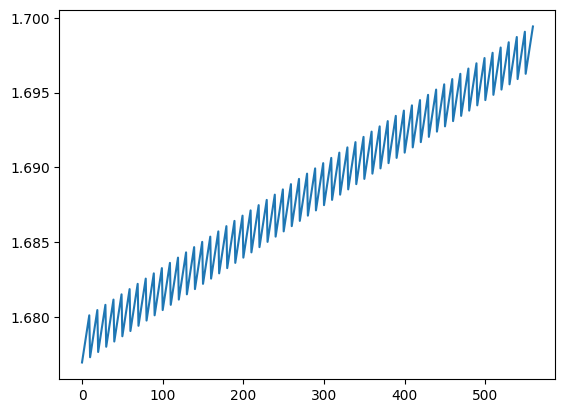

In [387]:
ax = plt.subplot(111)
_x = _x.view(-1)
ax.plot(np.arange(len(_x)), _x)

In [487]:
train_data

1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size([64])
1 torch.Size

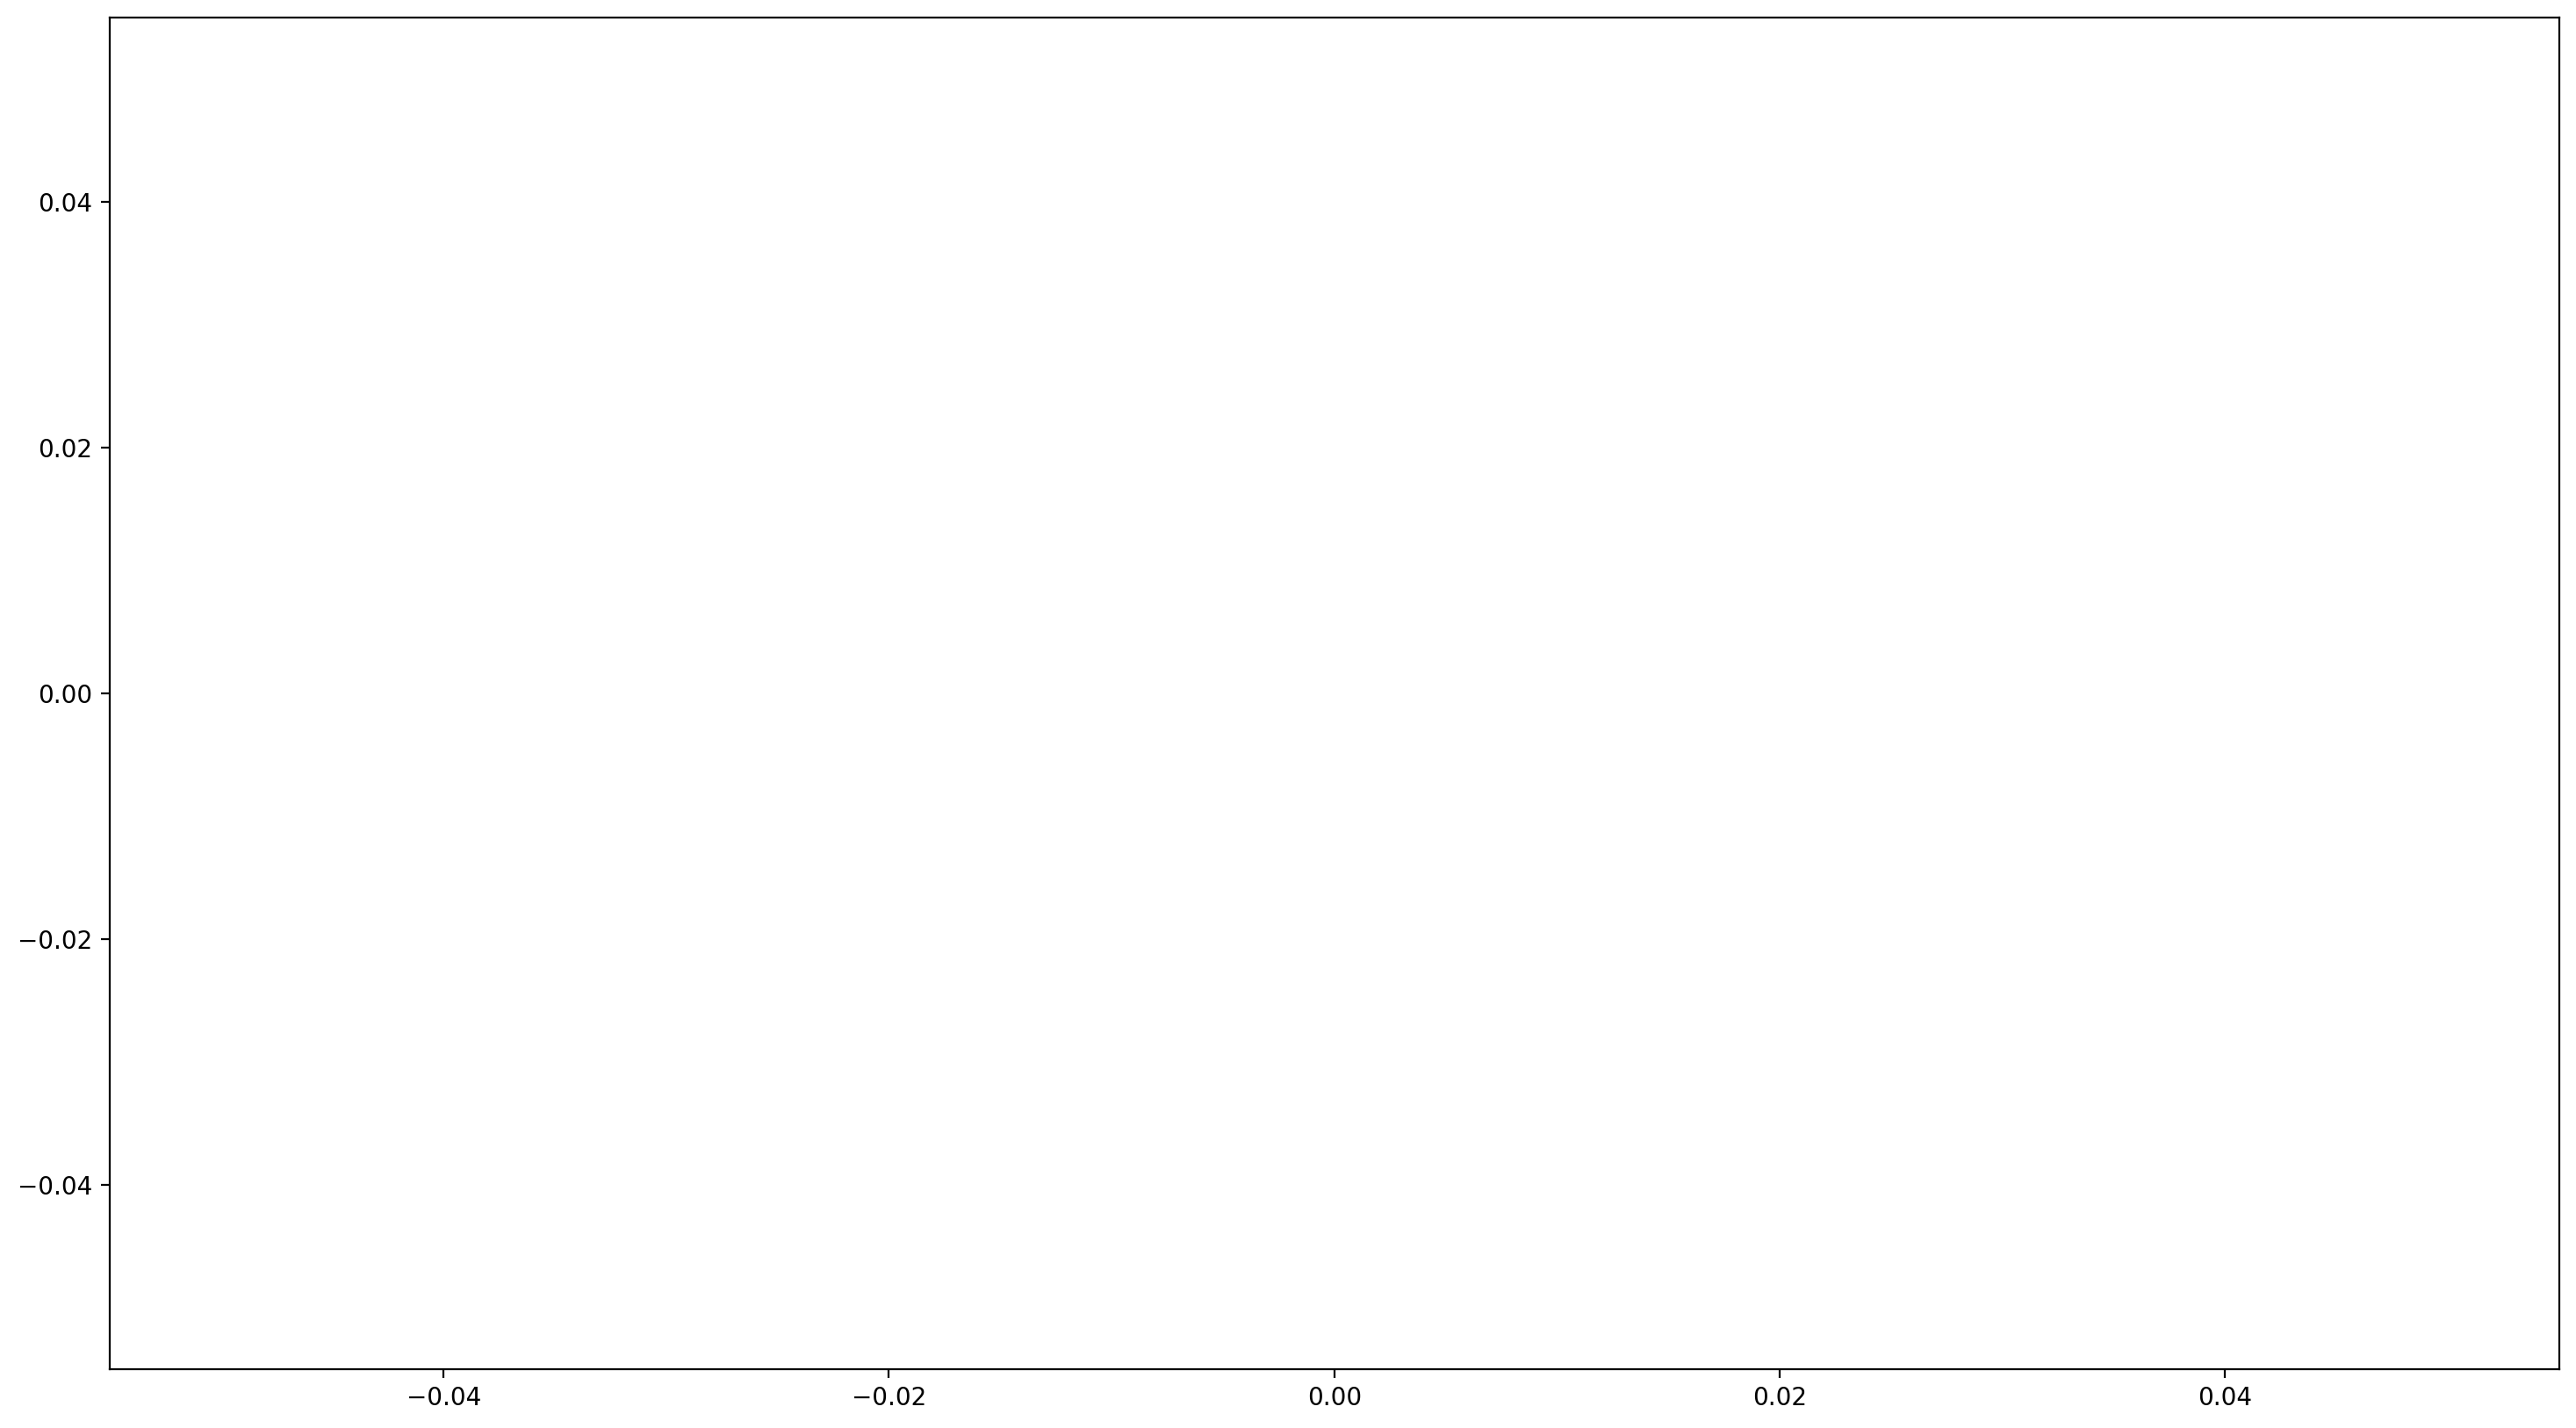

In [498]:
x_check = []
y_check = []
for _y in train_data:
    # x_check.extend(_x.view(-1).numpy())
    print(len(_y), _y[0].shape)
    # y_check.extend(_y.view(-1).numpy())
ax = plt.subplot(111)
ax.figure.set_size_inches(18, 10)
ax.figure.set_dpi(200)
ax.scatter(np.arange(len(y_check)), y_check, label="y = \sum_i(exp(w_j[i]*i*x_i))")

In [349]:
_y.shape

torch.Size([56, 1])

In [388]:
class SimpleRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last RNN step
        return out

In [389]:
model = SimpleRNNModel(input_size=1, hidden_size=50, output_size=1)

In [390]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [339]:
# Evaluation helper function
def evaluate_model(model, test_data):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        total_loss = 0
        for inputs, targets in test_data:
            outputs = model(inputs.to(torch.float32))
            loss = criterion(outputs, targets)
            total_loss += loss.item()
        print(f"Test Loss: {total_loss / len(test_data)}")
        return total_loss / len(test_data)

In [401]:
train_losses = []
test_losses = []

In [393]:
# inputs.view(1, sequence_length, 1).shape
# inputs.unsqueeze(1).to(torch.float32)
inputs.shape

torch.Size([56, 10, 1])

In [402]:
# The ideas is that
for epoch in range(5):
    for inputs, targets in train_data:
        optimizer.zero_grad()
        outputs = model(inputs.to(torch.float32))  # view(-1, sequence_length, 1))
        loss = criterion(outputs, targets)
        loss.backward()
        train_losses.append(loss.item()),
        optimizer.step()

        test_losses.append(evaluate_model(model, test_data))
    print(f"Epoch {epoch+1}, Train Loss: {loss.item()}")

Test Loss: 0.943003719855961
Test Loss: 0.7397301794502825
Test Loss: 0.6538905595384893
Test Loss: 0.6711263940447852
Test Loss: 0.7318172521061368
Test Loss: 0.7787487450100127
Test Loss: 0.8020422643139249
Test Loss: 0.8251264249048536
Test Loss: 0.8614553813896482
Test Loss: 0.9039490956162649
Test Loss: 0.9392025078099872
Test Loss: 0.9598803082628856
Test Loss: 0.9681248489826445
Test Loss: 0.9729345667929876
Test Loss: 0.98542311219942
Test Loss: 1.0139007369677226
Test Loss: 1.058963536270081
Test Loss: 1.1102721530293662
Test Loss: 1.1502589327948434
Test Loss: 1.1661380832157437
Test Loss: 1.1592756632774595
Test Loss: 1.1415898629597254
Test Loss: 1.1248609612858484
Test Loss: 1.1144935687383015
Test Loss: 1.1101917671778845
Test Loss: 1.109254488869319
Test Loss: 1.1091053438565088
Test Loss: 1.1083431925092424
Test Loss: 1.106780611333393
Test Loss: 1.1050091196620275
Test Loss: 1.1038379820566329
Test Loss: 1.1038086849545676
Test Loss: 1.1049130085914853
Test Loss: 1.106

In [212]:
inputs.shape

torch.Size([64, 10])

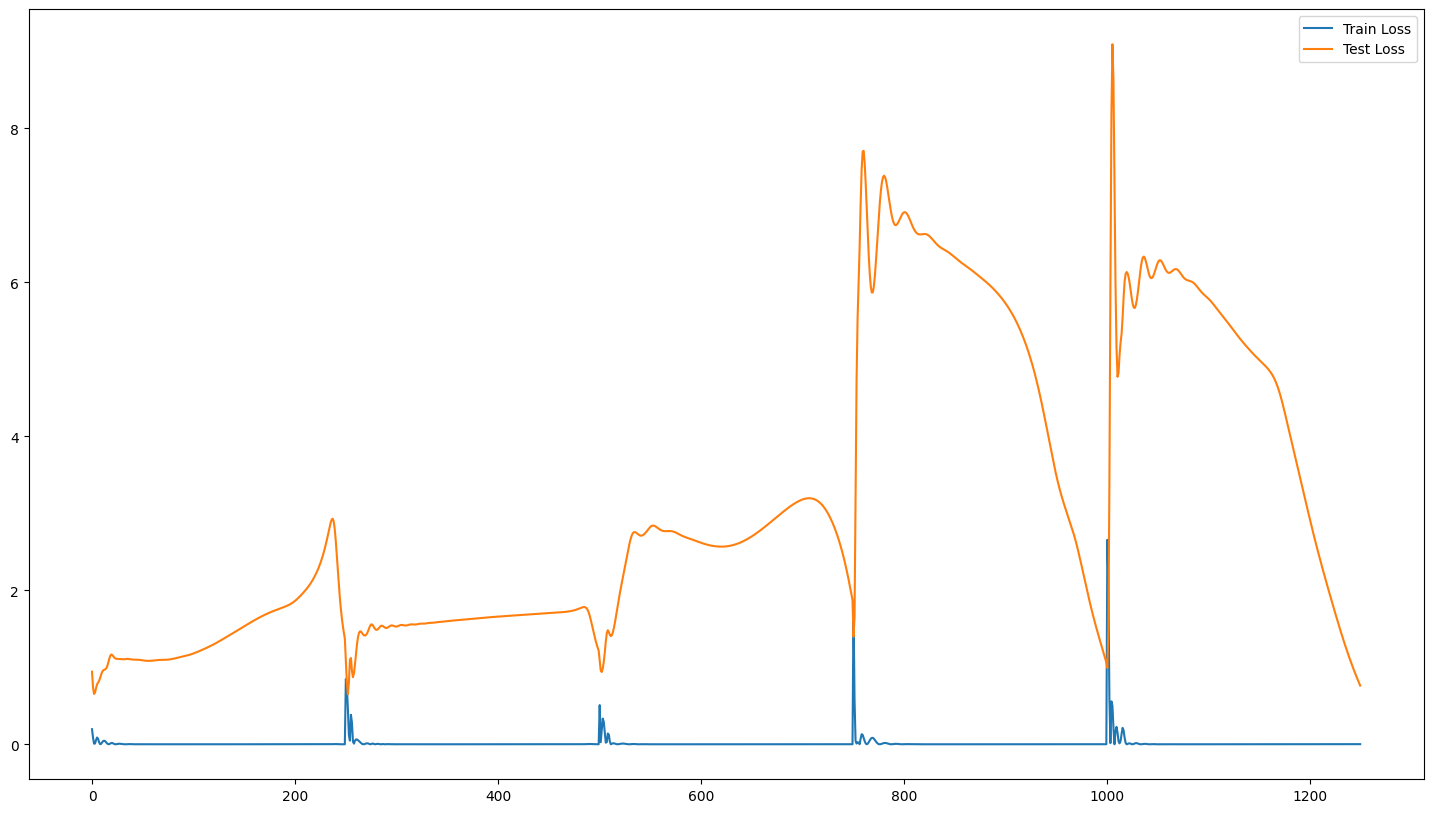

In [403]:
ax = plt.subplot(111)
ax.figure.set_size_inches(18, 10)
ax.plot(train_losses, label="Train Loss")
ax.plot(test_losses, label="Test Loss")
ax.legend(loc="upper right")

Now to generate some data using this data

In [399]:
x_test.shape

torch.Size([3998, 10, 1])

ValueError: x and y must have same first dimension, but have shapes (1900,) and (10,)

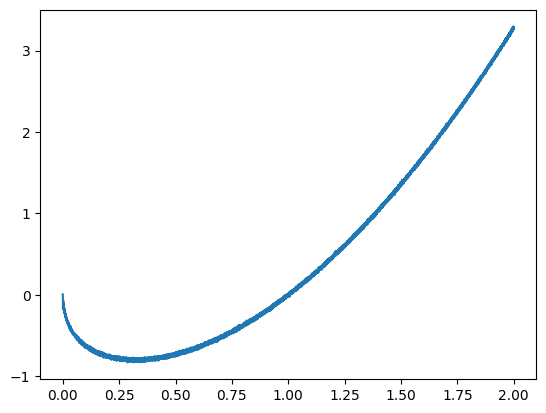

In [345]:
with torch.no_grad():
    y_init = []
    y_gen = []
    for x_i in x_test[0:10, :]:
        _y = model(torch.tensor([x_i]).reshape(1, 1, 1).to(torch.float32))

        y_init.append(_y.reshape(-1).item())

ax = plt.subplot(111)
ax.plot(x, y, label="GT")
ax.plot(x_gen, y_init, label="Generated")

In [245]:
for x, y in train_data:
    print(x.shape, y.shape)
    break

torch.Size([64, 10]) torch.Size([64, 1])


ValueError: x has 640 columns but y has 64 columns

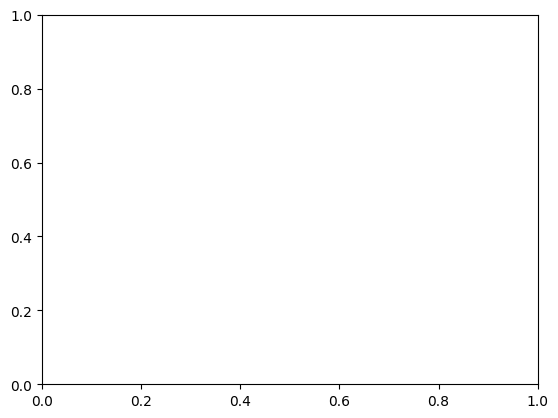

In [248]:
ax = plt.subplot(111)
ax.plot(x.reshape(1, -1), y.reshape(1, -1))